In [1]:
import sqlite3

# Connect to database (this will create it in memory)
conn = sqlite3.connect('sales_data.db')
cursor = conn.cursor()

# Create table
cursor.execute('''
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
''')

# Insert sample data
data = [
    ('Pen', 10, 5.0),
    ('Notebook', 5, 20.0),
    ('Pencil', 15, 2.0),
    ('Eraser', 20, 1.5),
    ('Pen', 8, 5.0),
    ('Notebook', 3, 20.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", data)
conn.commit()


In [2]:
import pandas as pd

query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""

df = pd.read_sql_query(query, conn)
df


,product,total_qty,revenue
0,Eraser,20,30.0
1,Notebook,8,160.0
2,Pen,18,90.0
3,Pencil,15,30.0


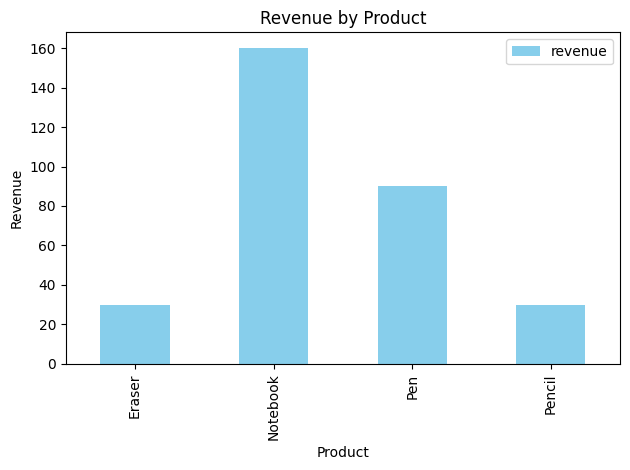

In [3]:
import matplotlib.pyplot as plt

df.plot(kind='bar', x='product', y='revenue', color='skyblue')
plt.title("Revenue by Product")
plt.ylabel("Revenue")
plt.xlabel("Product")
plt.tight_layout()
plt.savefig("sales_chart.png")  # Optional: Save the chart
plt.show()
